# hw2: Решающие деревья

*Спасибо великому курсу великого Евгения Соколова*

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплементацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Все данные, на которых будут обучаться модели, вы можете найти на диске.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Неэффективная и/или неоригинальная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Заполненный ноутбук ```hw2-trees.ipynb``` и модуль с реализованными функциями и классами ```hw2code.py``` необходимо загрузить на свой Github. Затем нужно оставить комментарий в Google-таблице с оценками в столбце <<hw2>> в строке со своей фамилией о том, что вы выполнили работу с указанием ника на Kaggle.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [ ]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

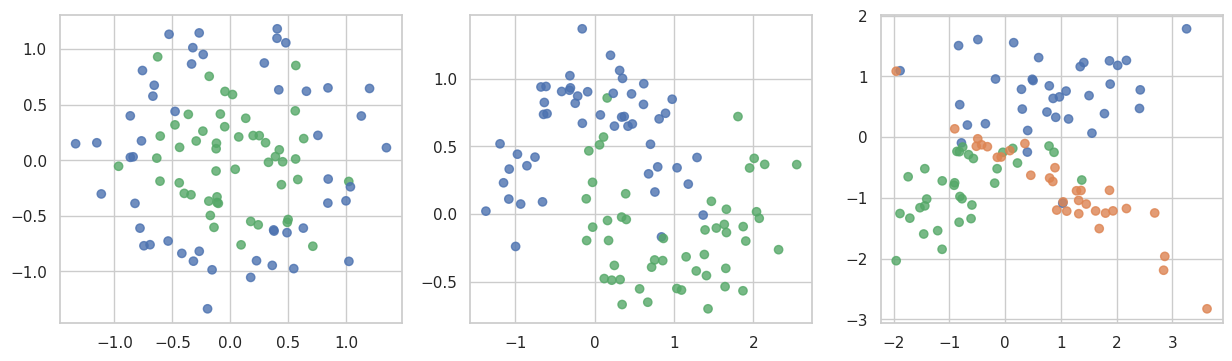

In [ ]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [ ]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

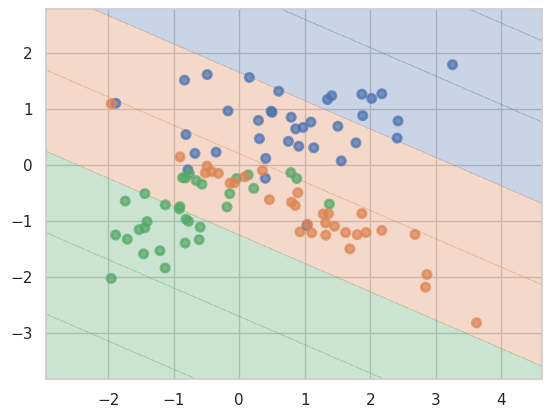

In [ ]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Набор 1:
  Точность на обучении:  1.0000
  Точность на тесте:     0.7333
  Разница (переобучение): 0.2667


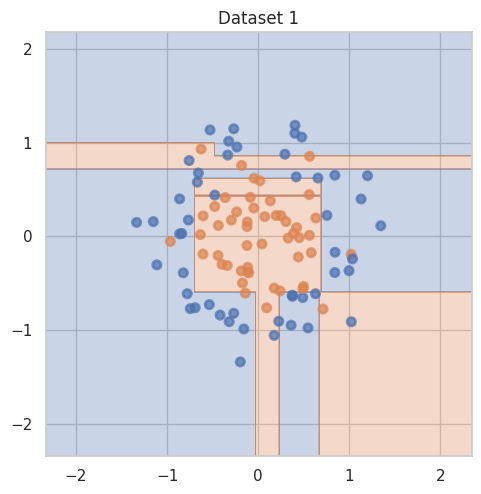

Набор 2:
  Точность на обучении:  1.0000
  Точность на тесте:     0.8667
  Разница (переобучение): 0.1333


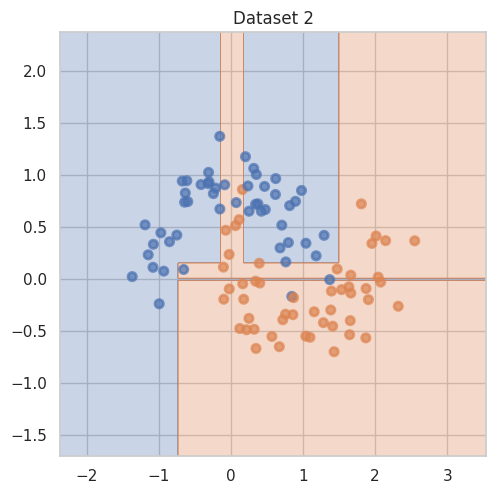

Набор 3:
  Точность на обучении:  1.0000
  Точность на тесте:     0.8333
  Разница (переобучение): 0.1667


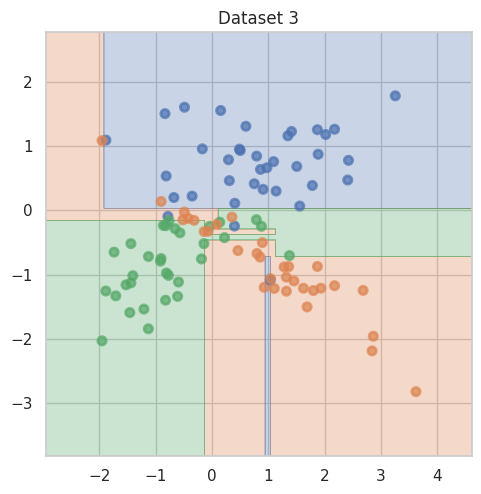

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

for idx, (features, labels) in enumerate(datasets):
    x_tr, x_ts, y_tr, y_ts = train_test_split(features, labels, test_size=0.3, random_state=42)

    model = DecisionTreeClassifier()
    model.fit(x_tr, y_tr)

    train_pred = model.predict(x_tr)
    test_pred = model.predict(x_ts)
    acc_train = accuracy_score(y_tr, train_pred)
    acc_test = accuracy_score(y_ts, test_pred)
    delta = acc_train - acc_test

    print(f"Набор {idx + 1}:")
    print(f"  Точность на обучении:  {acc_train:.4f}")
    print(f"  Точность на тесте:     {acc_test:.4f}")
    print(f"  Разница (переобучение): {delta:.4f}")

    plt.figure(figsize=(5.5, 5.5))
    plot_surface(model, features, labels)
    plt.title(f"Dataset {idx + 1}")
    plt.show()


__Ответ:__

на всех наборах дерево хорошо запомнило обучающую выборку - точность на обучении единица, но на тесте результат ниже. На 1 датасете видно, как дерево режет пространство тонкими полосками и пытается повторить форму окружности с помощью прямых. На 2 датасете граница всё ещё рваная, но выглядит лучше. А в третьем датасете, снова лоскутная граница, модель старалась угодить каждой точке, вместо того чтобы понять общую картину. Дерево просто запоминает всё, но на новых данных теряется, переобучается и не умеет обобщать.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?


Набор данных 1:
  depth=2, leaf=1 → train: 0.83, test: 0.63


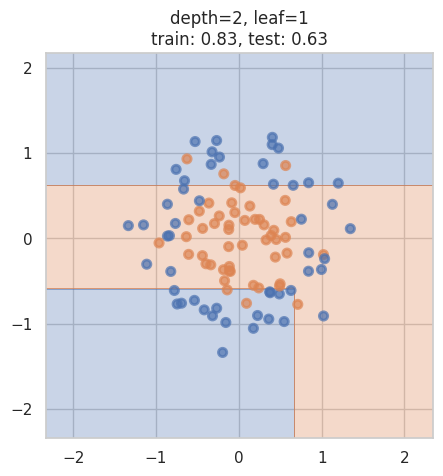

  depth=5, leaf=1 → train: 0.97, test: 0.73


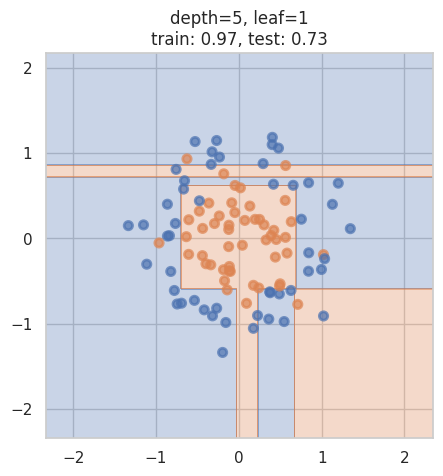

  depth=None, leaf=1 → train: 1.00, test: 0.77


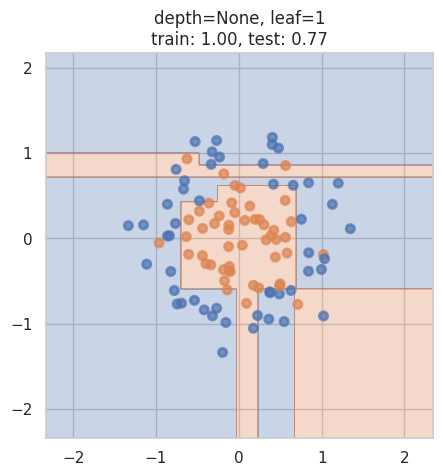

  depth=2, leaf=5 → train: 0.81, test: 0.67


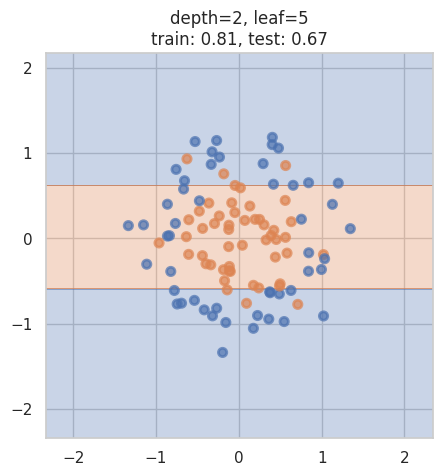

  depth=5, leaf=5 → train: 0.87, test: 0.90


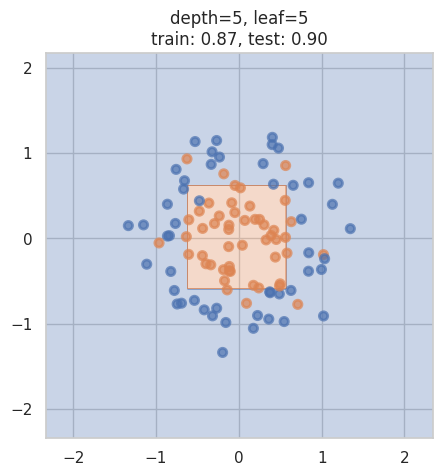

  depth=None, leaf=5 → train: 0.87, test: 0.90


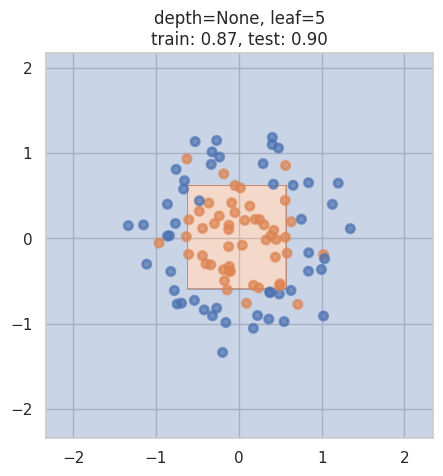

  depth=2, leaf=10 → train: 0.81, test: 0.67


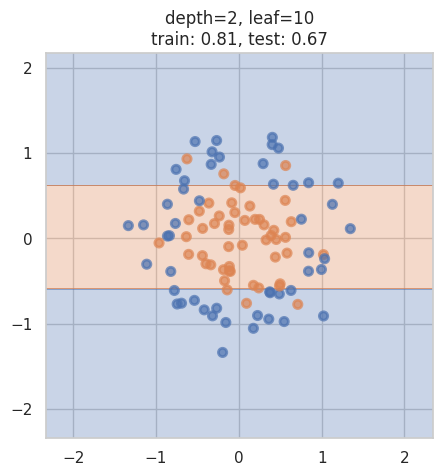

  depth=5, leaf=10 → train: 0.81, test: 0.77


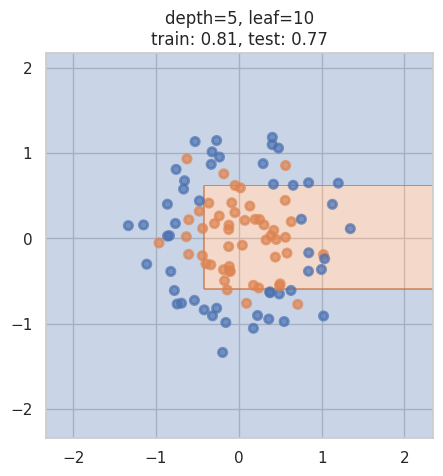

  depth=None, leaf=10 → train: 0.81, test: 0.77


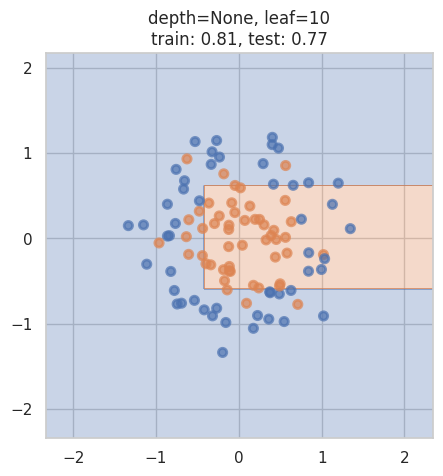


Набор данных 2:
  depth=2, leaf=1 → train: 0.91, test: 0.93


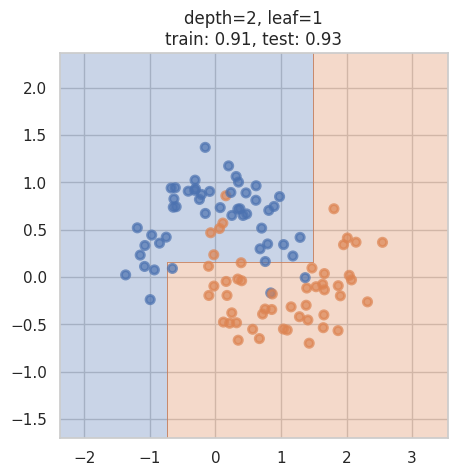

  depth=5, leaf=1 → train: 1.00, test: 0.87


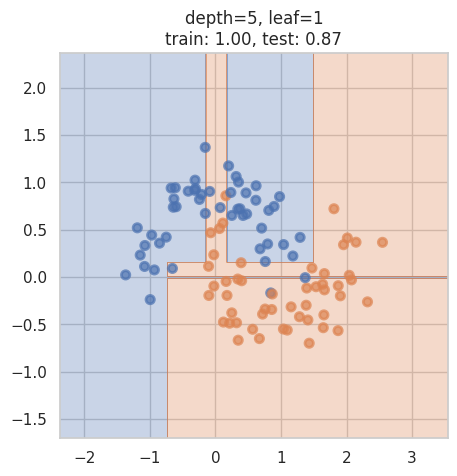

  depth=None, leaf=1 → train: 1.00, test: 0.87


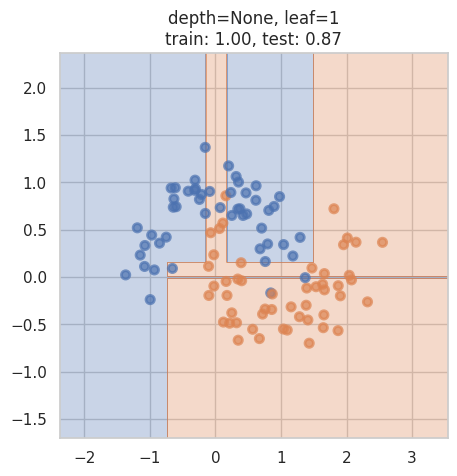

  depth=2, leaf=5 → train: 0.89, test: 0.80


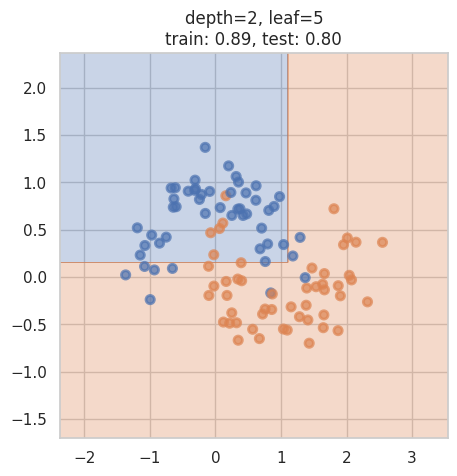

  depth=5, leaf=5 → train: 0.96, test: 0.73


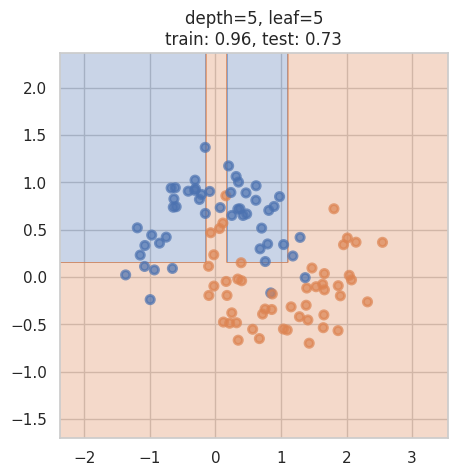

  depth=None, leaf=5 → train: 0.96, test: 0.73


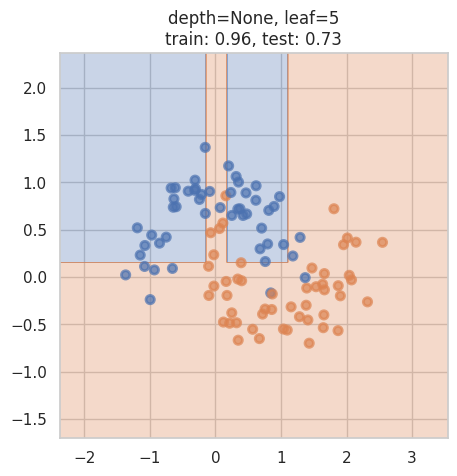

  depth=2, leaf=10 → train: 0.84, test: 0.80


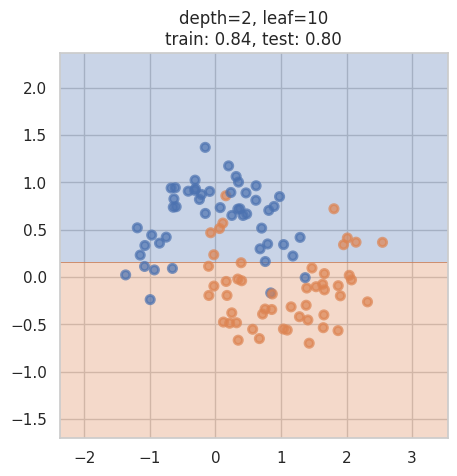

  depth=5, leaf=10 → train: 0.87, test: 0.77


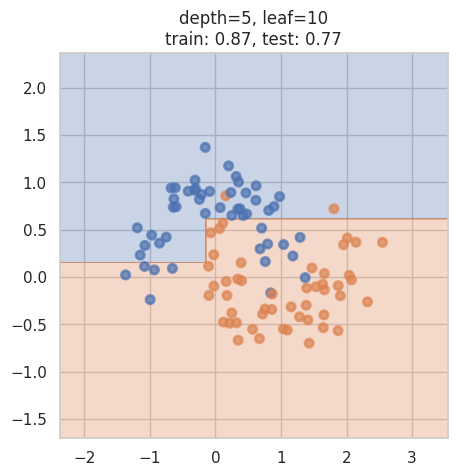

  depth=None, leaf=10 → train: 0.87, test: 0.77


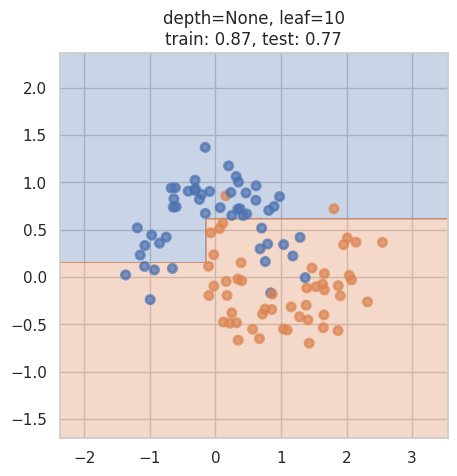


Набор данных 3:
  depth=2, leaf=1 → train: 0.90, test: 0.77


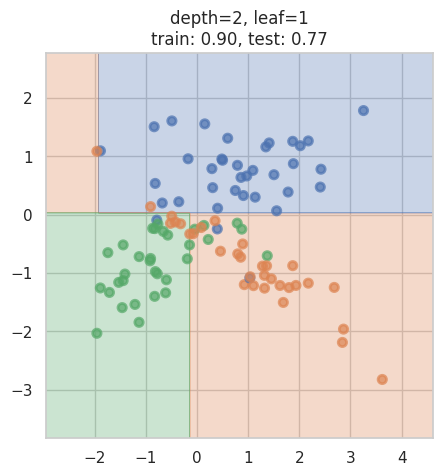

  depth=5, leaf=1 → train: 0.97, test: 0.77


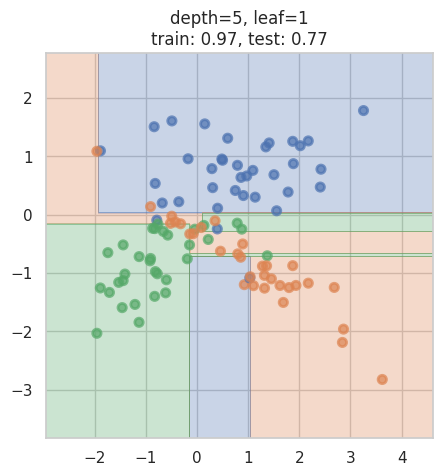

  depth=None, leaf=1 → train: 1.00, test: 0.77


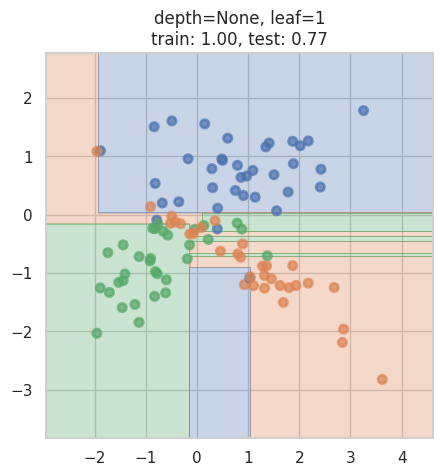

  depth=2, leaf=5 → train: 0.89, test: 0.77


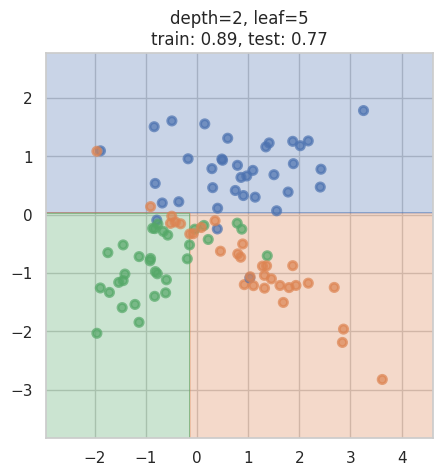

  depth=5, leaf=5 → train: 0.90, test: 0.70


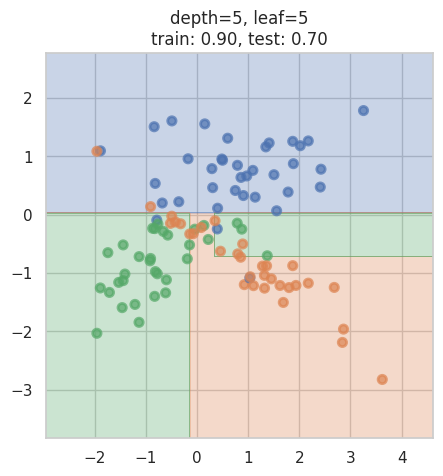

  depth=None, leaf=5 → train: 0.90, test: 0.77


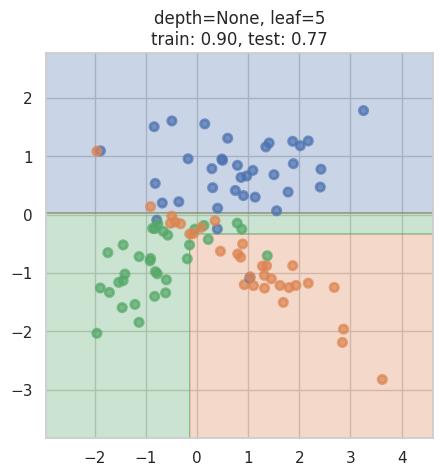

  depth=2, leaf=10 → train: 0.89, test: 0.77


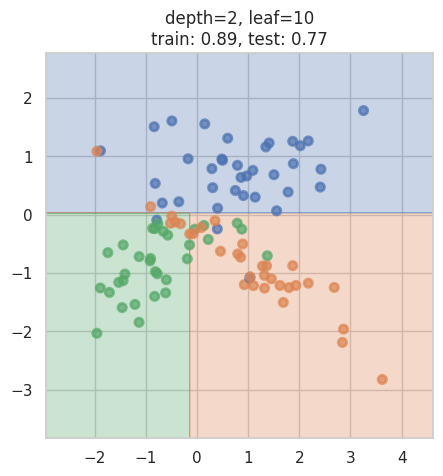

  depth=5, leaf=10 → train: 0.89, test: 0.77


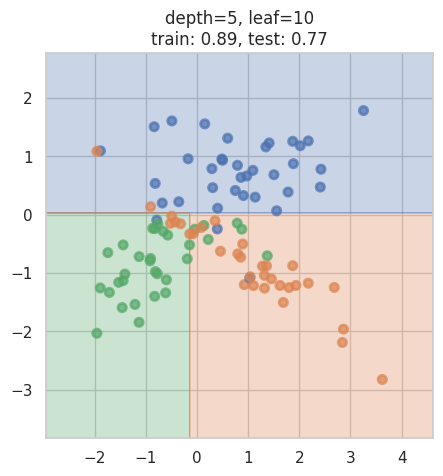

  depth=None, leaf=10 → train: 0.89, test: 0.77


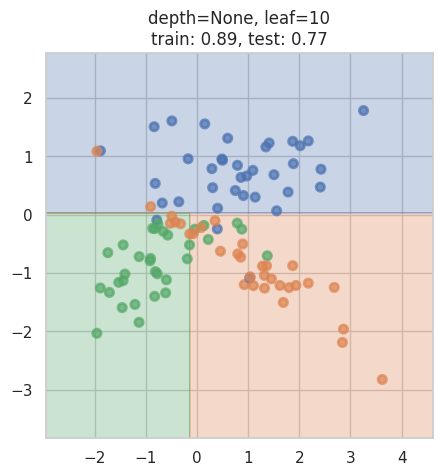

In [ ]:
depth_list = [2, 5, None]
leaf_sizes = [1, 5, 10]

for dset_idx, (data, target) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

    print(f"\nНабор данных {dset_idx + 1}:")

    for leaf in leaf_sizes:
        for depth in depth_list:
            model = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf)
            model.fit(x_train, y_train)

            acc_train = model.score(x_train, y_train)
            acc_test = model.score(x_test, y_test)

            print(f"  depth={depth}, leaf={leaf} → train: {acc_train:.2f}, test: {acc_test:.2f}")

            plt.figure(figsize=(5, 5))
            plot_surface(model, data, target)
            plt.title(f"depth={depth}, leaf={leaf}\ntrain: {acc_train:.2f}, test: {acc_test:.2f}")
            plt.show()



__Ответ:__

В первом датасете видно, что дерево очень легко переобучается: при большой глубине и маленьком листе оно просто нарезает всё пространство мелкими полосками, чтобы угодить каждой точке. Когда увеличиваешь min_samples_leaf — поверхность становится заметно спокойнее, модель начинает немного обобщать. Но в целом тут видно, что задачу тяжело решить прямыми — поэтому при высокой сложности модель работает хуже.

Во втором датасете границы уже выглядят нормально и точность довольно высокая. Если дальше увеличивать глубину, можно словить переобучение. Самый хороший результат получается при средней глубине и min_samples_leaf где-то 5–10 — тогда модель остаётся устойчивой и обобщает хорошо.

В третьем датасете результаты почти не меняются, данные сами по себе хорошо делятся, и даже простое дерево справляется. Если сильно увеличивать сложность модели, она начинает просто рисовать лишние куски, которые ничего не дают.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

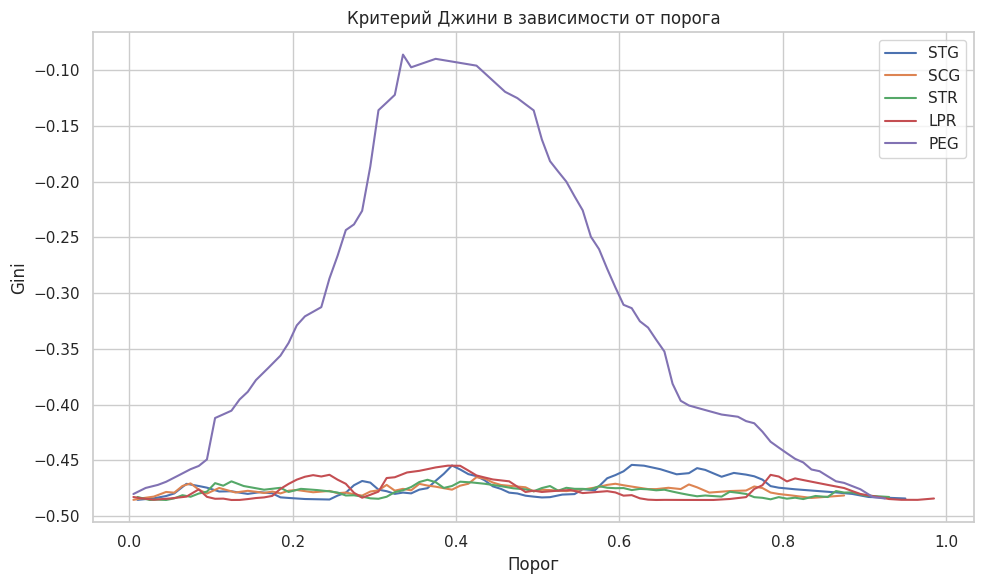

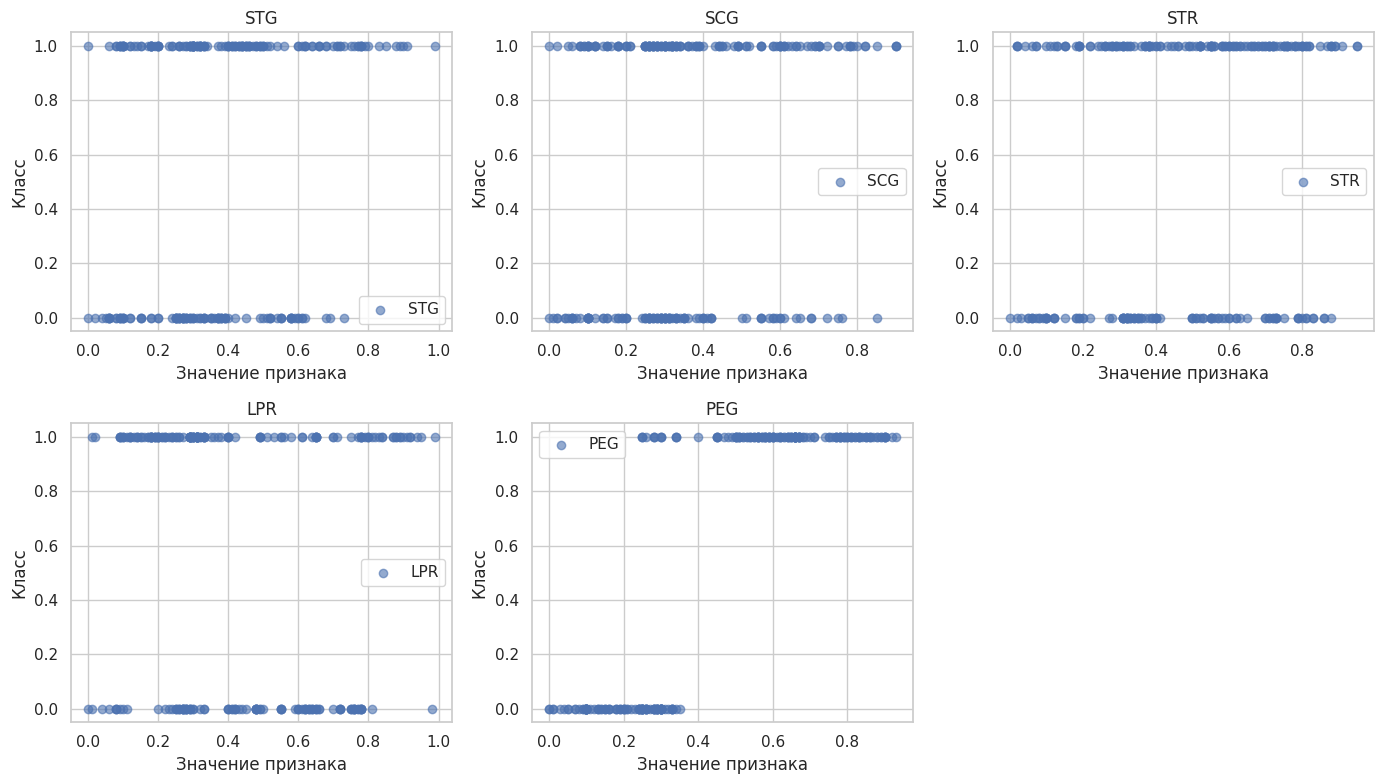

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hw2code import find_best_split

df = pd.read_csv('datasets/students.csv')

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
columns = df.columns[:-1]

plt.figure(figsize=(10, 6))

for idx in range(X.shape[1]):
    col_data = X[:, idx]
    t_values, gini_scores, _, _ = find_best_split(col_data, y)

    plt.plot(t_values, gini_scores, label=columns[idx])

plt.title('Критерий Джини в зависимости от порога')
plt.xlabel('Порог')
plt.ylabel('Gini')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))

for idx in range(X.shape[1]):
    plt.subplot(2, 3, idx + 1)
    plt.scatter(X[:, idx], y, alpha=0.6, label=columns[idx])
    plt.title(columns[idx])
    plt.xlabel('Значение признака')
    plt.ylabel('Класс')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()


__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from hw2code import DecisionTree


df = pd.read_csv('datasets/agaricus-lepiota.data', header=None)

for col in df.columns:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

feature_types = ['categorical'] * X.shape[1]

model = DecisionTree(feature_types)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")


Accuracy: 0.9763


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

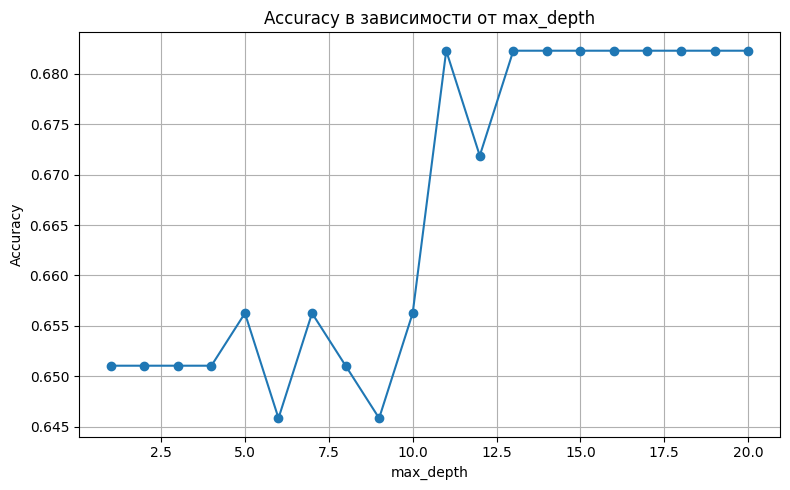

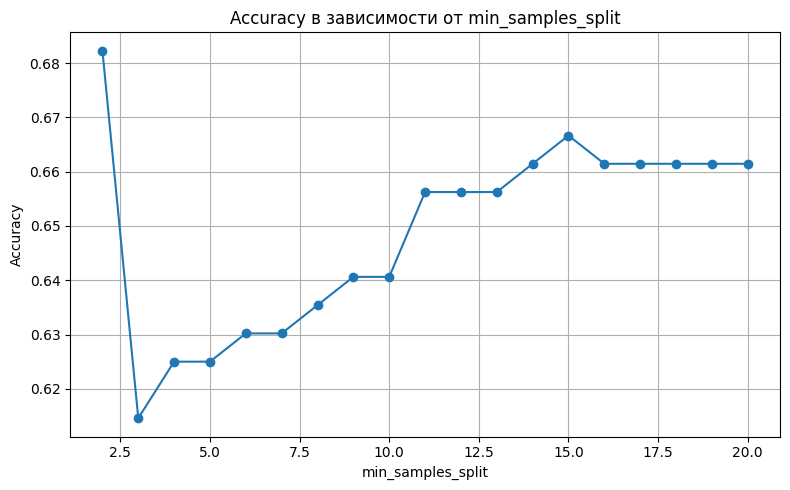

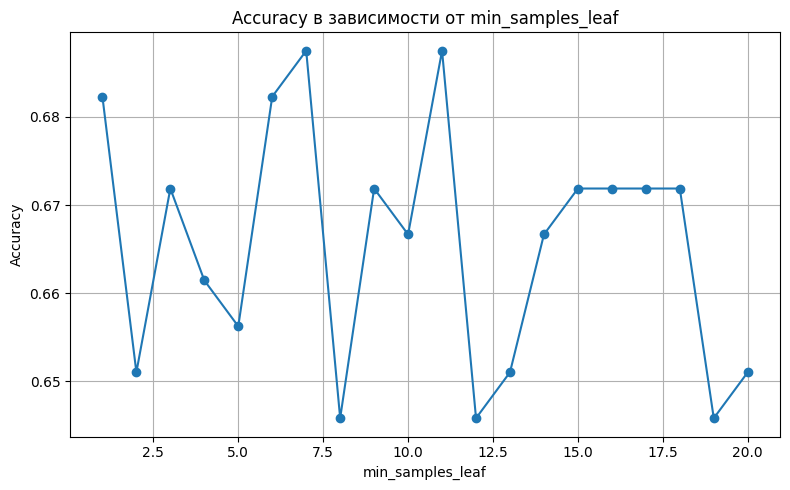

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from hw2code import DecisionTree

data = pd.read_csv("datasets/tic-tac-toe-endgame.csv")

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

for i in range(X.shape[1]):
    le = LabelEncoder()
    X[:, i] = le.fit_transform(X[:, i])

le_y = LabelEncoder()
y = le_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def plot_acc_vs_param(param_name, values):
    accs = []
    for v in values:
        model = DecisionTree(
            feature_types=["categorical"] * X.shape[1],
            **{param_name: v}
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accs.append(accuracy_score(y_test, y_pred))

    plt.figure(figsize=(8, 5))
    plt.plot(values, accs, marker='o')
    plt.title(f"Accuracy в зависимости от {param_name}")
    plt.xlabel(param_name)
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_acc_vs_param("max_depth", range(1, 21))
plot_acc_vs_param("min_samples_split", range(2, 21))
plot_acc_vs_param("min_samples_leaf", range(1, 21))


__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [7]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder


def preprocess_data(name, url):
    df = pd.read_csv(url, header=None)

    if name == "mushrooms":
        X = df.iloc[:, 1:]
        y = df.iloc[:, 0]
    elif name == "tic_tac_toe":
        X = df.iloc[:, :-1]
        y = df.iloc[:, -1]
    elif name == "cars":
        X = df.iloc[:, :-1]
        y = df.iloc[:, -1].replace({'unacc': 0, 'acc': 0, 'good': 1, 'vgood': 1})
    elif name == "nursery":
        X = df.iloc[:, :-1]
        y = df.iloc[:, -1].replace({'not_recom': 0, 'recommend': 0, 'very_recom': 1, 'priority': 1, 'spec_prior': 1})

    le = LabelEncoder()
    X = X.apply(le.fit_transform)
    y = le.fit_transform(y) if y.dtype == object else y.values
    return X, y

class DTReal:
    def fit(self, X, y):
        self.clf = DecisionTree(["real"] * X.shape[1])
        self.clf.fit(X.values.astype(float), y)

    def predict(self, X):
        return self.clf.predict(X.values.astype(float))

class DTCategorical:
    def fit(self, X, y):
        self.clf = DecisionTree(["categorical"] * X.shape[1])
        self.clf.fit(X.values, y)

    def predict(self, X):
        return self.clf.predict(X.values)

class DTOneHot:
    def fit(self, X, y):
        self.enc = OneHotEncoder(sparse_output=False)
        X_encoded = self.enc.fit_transform(X)
        self.clf = DecisionTree(["real"] * X_encoded.shape[1])
        self.clf.fit(X_encoded, y)

    def predict(self, X):
        X_encoded = self.enc.transform(X)
        return self.clf.predict(X_encoded)

class SklearnWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model_cls):
        self.model_cls = model_cls

    def fit(self, X, y):
        self.model = self.model_cls()
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)


results = {}
scorer = make_scorer(accuracy_score)

urls = {
    "mushrooms": "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data",
    "tic_tac_toe": "https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data",
    "cars": "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data",
    "nursery": "https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data"
}

for name, url in urls.items():
    X, y = preprocess_data(name, url)

    real = cross_val_score(SklearnWrapper(DTReal), X, y, cv=10, scoring=scorer).mean()
    categorial = cross_val_score(SklearnWrapper(DTCategorical), X, y, cv=10, scoring=scorer).mean()
    onehot = cross_val_score(SklearnWrapper(DTOneHot), X, y, cv=10, scoring=scorer).mean()
    sk = cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring=scorer).mean()

    results[name] = [real, categorial, onehot, sk]
    print(name)
    print(f"вещественные: {real:.4f}")
    print(f"категориальные: {categorial:.4f}")
    print(f"вещественные + onehotencoding: {onehot:.4f}")
    print(f"sklearn: {sk:.4f}")

mushrooms
вещественные: 0.9764
категориальные: 0.9937
вещественные + onehotencoding: 0.9667
sklearn: 0.9611
tic_tac_toe
вещественные: 0.4022
категориальные: 0.4951
вещественные + onehotencoding: 0.3866
sklearn: 0.7561


<ipython-input-7-e800e7db64da>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df.iloc[:, -1].replace({'unacc': 0, 'acc': 0, 'good': 1, 'vgood': 1})


cars
вещественные: 0.9148
категориальные: 0.9542
вещественные + onehotencoding: 0.9194
sklearn: 0.9433


<ipython-input-7-e800e7db64da>:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df.iloc[:, -1].replace({'not_recom': 0, 'recommend': 0, 'very_recom': 1, 'priority': 1, 'spec_prior': 1})


nursery
вещественные: 0.9998
категориальные: 0.9998
вещественные + onehotencoding: 0.9998
sklearn: 0.9997


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Алгоритмы показывают разное качество на разных датасетах. На грибах и на данных про машины мои деревья с категориальными признаками сработали хорошо, потому что там признаки чётко делят классы и дерево легко находит нужные разбиения.

А вот на крестиках-ноликах мои деревья сильно проигрывают дереву из sklearn. Простое дерево не справляется.

В датасете nursery неожиданно лучше всех сработало дерево с one-hot-кодированием. Скорее всего, потому что в этом наборе много признаков с редкими значениями, и one-hot помогает точнее их учесть.

В результатах есть немного случайности, например из-за разного разбиения на обучающую и тестовую выборки при кросс-валидации

Чтобы улучшить качество, можно поэкспериментировать с параметрами дерева (глубиной и минимальным количеством объектов в листьях) или попробовать использовать более сложные модели

Вставьте что угодно, описывающее ваши впечатления от этого задания:

In [ ]:
ребята трава на улице выросла! бросайте свои компухтеры айда траву трогать!